In [2]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^{2*Z_{n}^{-p_{n}^{Z_{n}^{p_{n+1}}}}}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Clownscape

    Sequential iteration (on the complex plane) of difference equation:
        for k = 1, 2,... , (number of parameters - 1)
        Zn = Z**(2*Z**(-(p[k])**(Z**(-p[k+1]))))
    where p = 
    [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
    produces a chaotic screenscape.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [4]:
def ItchicuPpwrF(Z, p, Z0=None, ET=None, Zm1=0, Zm2=0):
    """
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    for k in range(0, len(p) - 1):
        try:
            Zn = Z**(2*Z**(-(p[k])**(Z**(-p[k+1]))))
        except:
            return Z
            pass
        
        if np.isfinite(Zn):
            Z = Zn
        else:
            return Z
        
    return Z

In [5]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 400, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 0.2

par_set['it_max'] = 32
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True

p = [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
list_tuple = [(ItchicuPpwrF, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

25.850285053253174 	 total time
converstion time =	 0.6843059062957764


coloring time =	 1.9089999198913574


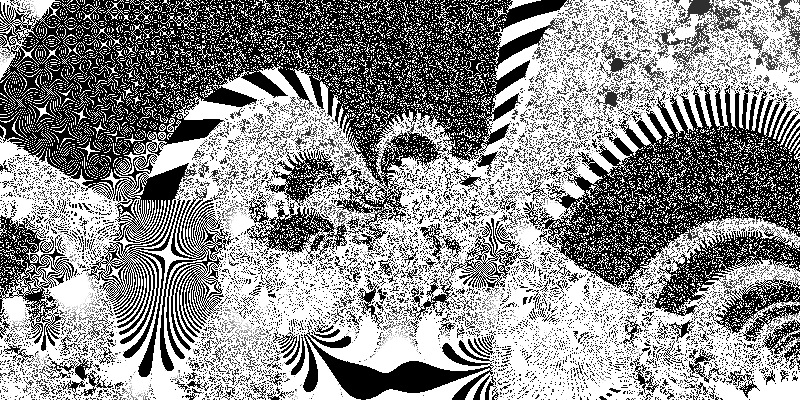

In [6]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 1.8747429847717285


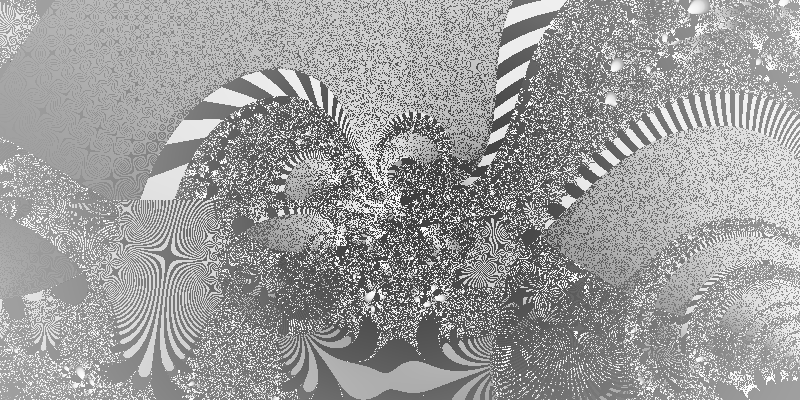

In [7]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 1.8761088848114014


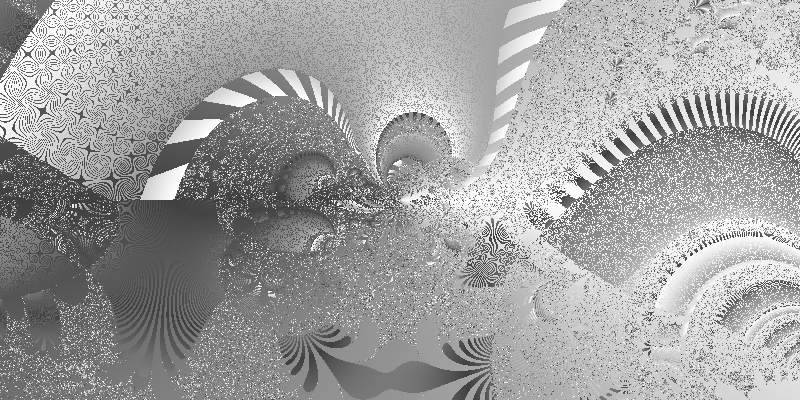

In [8]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 4.2733519077301025


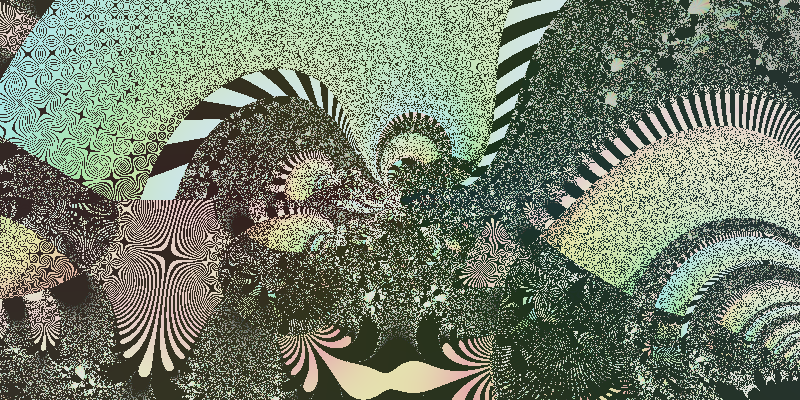

In [9]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - ncp.graphic_norm(Zd)
V = 1 - ncp.graphic_norm(ET)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 4.223165988922119


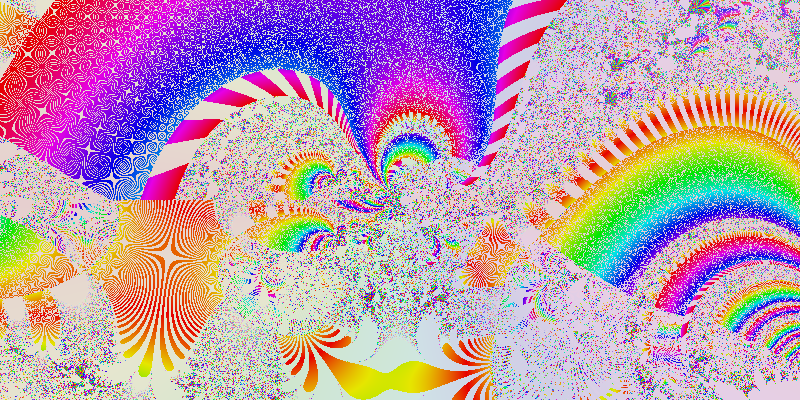

In [10]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
Z_v = Z-Z0
H = ncp.graphic_norm(np.arctan2(np.imag(Z_v), np.real(Z_v)))
S = 1 - ncp.graphic_norm(ET)
V = 1 - ncp.graphic_norm(Z_v)

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

In [11]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 200, 'n_cols': 400}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 0.25

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True

p = [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
list_tuple = [(ItchicuPpwrF, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

11.881381034851074 	 total time


ET =	 1


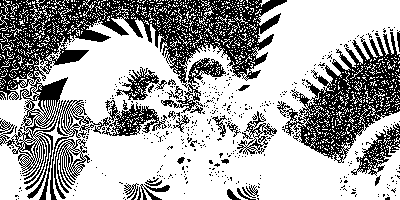

ET =	 2


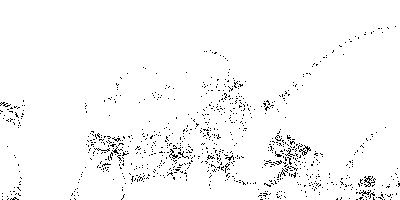

ET =	 3


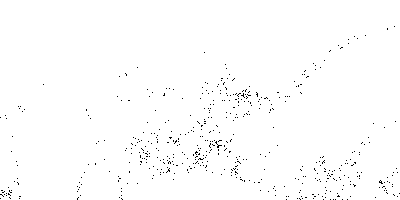

ET =	 4


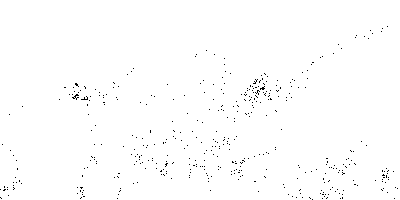

ET =	 5


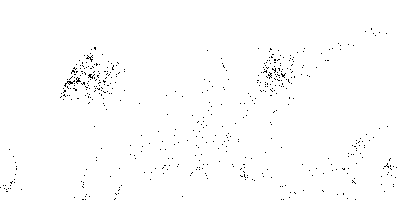

ET =	 6


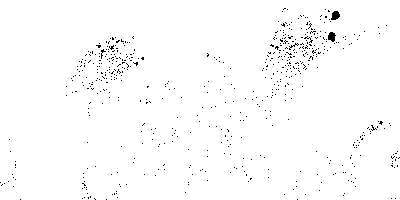

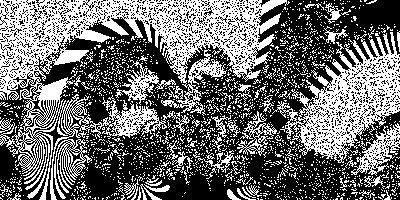

In [12]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [13]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
total_number_of_points = par_set['n_rows'] * par_set['n_cols']
print('\nHow many never escaped:\t',(ET_sm > k).sum(),'of',total_number_of_points)

0 0
1 27631
2 2160
3 728
4 583
5 751
6 1073
7 1060
8 843
9 394
10 272
11 191
12 168
13 153
14 144
15 120
16 116
17 102
18 93
19 95
20 64
21 67
22 79
23 55
24 50
25 31
26 38
27 62
28 39
29 44
30 44
31 37
32 34
33 29
34 24
35 34
36 22
37 22
38 21
39 20
40 16
41 21
42 15
43 23
44 15
45 15
46 22
47 13
48 17
49 13
50 16
51 14
52 15
53 14
54 15
55 19
56 16
57 17
58 16
59 14
60 18
61 14
62 4
63 12
64 12

How many never escaped:	 42121 of 80000


In [14]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  11.11 153.3 degrees

    42121 total unescaped points

   points near V       (plane units)
    42121 within V/ 1  (11.113)
    18561 within V/ 2  (5.557)
     8102 within V/ 3  (3.704)
     3745 within V/ 4  (2.778)
     1955 within V/ 5  (2.223)
     1192 within V/ 6  (1.852)
      881 within V/ 7  (1.588)
      684 within V/ 8  (1.389)
      551 within V/ 9  (1.235)
      443 within V/10  (1.111)
      374 within V/11  (1.010)
